<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/CNN_MLP_MODELS_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN- Models: CIFAR-10**

# **Impor Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Data Preprocessing dan Augmentasi**

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


# **Model CNN (Convolutional Neural Network)**

In [ ]:
# CNN Model in PyTorch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# **Model MLP (Multilayer Perceptron)**

In [ ]:
# MLP Model in PyTorch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Initialize models
cnn_model = CNN()
mlp_model = MLP()

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.0005)
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.0005)

# **Fungsi Pelatihan Model**

In [ ]:
# Function to train model
def train_model(model, trainloader, optimizer, num_epochs=30):
    model.train()
    train_loss = []
    train_acc = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in trainloader:
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    return train_loss, train_acc

# **Fungsi Evaluasi Model**

In [ ]:
# Function to evaluate model
def evaluate_model(model, testloader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())

    return y_true, y_pred

In [ ]:
# Train CNN and MLP models
cnn_loss, cnn_acc = train_model(cnn_model, trainloader, optimizer_cnn, num_epochs=30)
mlp_loss, mlp_acc = train_model(mlp_model, trainloader, optimizer_mlp, num_epochs=30)

Epoch 1/30, Loss: 1.5414, Accuracy: 44.10%
Epoch 2/30, Loss: 1.3591, Accuracy: 51.51%
Epoch 3/30, Loss: 1.2311, Accuracy: 56.30%
Epoch 4/30, Loss: 1.1433, Accuracy: 59.33%
Epoch 5/30, Loss: 1.0730, Accuracy: 62.25%
Epoch 6/30, Loss: 1.0265, Accuracy: 64.21%
Epoch 7/30, Loss: 0.9693, Accuracy: 66.04%
Epoch 8/30, Loss: 0.9372, Accuracy: 67.45%
Epoch 9/30, Loss: 0.9109, Accuracy: 68.30%
Epoch 10/30, Loss: 0.8879, Accuracy: 69.10%
Epoch 11/30, Loss: 0.8551, Accuracy: 70.18%
Epoch 12/30, Loss: 0.8330, Accuracy: 71.21%
Epoch 13/30, Loss: 0.8270, Accuracy: 71.10%
Epoch 14/30, Loss: 0.8044, Accuracy: 72.15%
Epoch 15/30, Loss: 0.7895, Accuracy: 72.69%
Epoch 16/30, Loss: 0.7705, Accuracy: 73.21%
Epoch 17/30, Loss: 0.7639, Accuracy: 73.54%
Epoch 18/30, Loss: 0.7425, Accuracy: 74.23%
Epoch 19/30, Loss: 0.7329, Accuracy: 74.42%
Epoch 20/30, Loss: 0.7302, Accuracy: 74.78%
Epoch 21/30, Loss: 0.7142, Accuracy: 74.97%
Epoch 22/30, Loss: 0.7046, Accuracy: 75.68%
Epoch 23/30, Loss: 0.6995, Accuracy: 75.9

In [ ]:
# Evaluate CNN and MLP models
y_true_cnn, y_pred_cnn = evaluate_model(cnn_model, testloader)
y_true_mlp, y_pred_mlp = evaluate_model(mlp_model, testloader)

# **CNN Model Evaluation**

In [ ]:
# Print CNN evaluation metrics
print("CNN Model Evaluation:")
print(f'Accuracy: {accuracy_score(y_true_cnn, y_pred_cnn)}')
print(f'Precision: {precision_score(y_true_cnn, y_pred_cnn, average="macro")}')
print(f'Recall: {recall_score(y_true_cnn, y_pred_cnn, average="macro")}')
print(f'F1 Score: {f1_score(y_true_cnn, y_pred_cnn, average="macro")}')

CNN Model Evaluation:
Accuracy: 0.7606
Precision: 0.7635451025751413
Recall: 0.7605999999999999
F1 Score: 0.7600550151519827


# **MLP Model Evaluation**

In [ ]:
# Print MLP evaluation metrics
print("MLP Model Evaluation:")
print(f'Accuracy: {accuracy_score(y_true_mlp, y_pred_mlp)}')
print(f'Precision: {precision_score(y_true_mlp, y_pred_mlp, average="macro")}')
print(f'Recall: {recall_score(y_true_mlp, y_pred_mlp, average="macro")}')
print(f'F1 Score: {f1_score(y_true_mlp, y_pred_mlp, average="macro")}')

MLP Model Evaluation:
Accuracy: 0.5623
Precision: 0.5626817156717656
Recall: 0.5623
F1 Score: 0.5613682483619946


In [ ]:
# Plotting the comparison of Accuracy and Loss between CNN and MLP
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# **Visualisasi Perbandingan Akurasi dan Loss CNN dengan MLP**

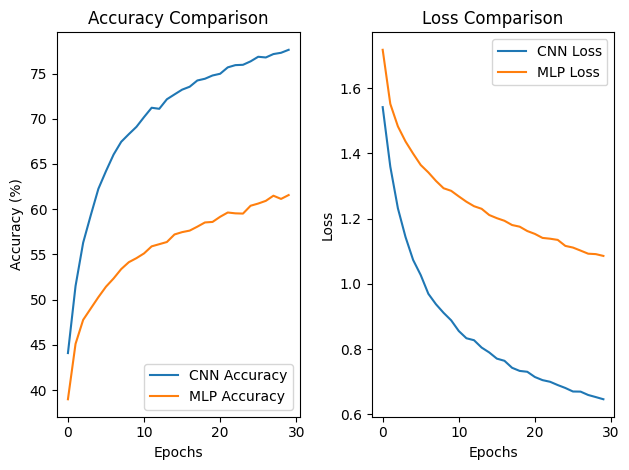

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(cnn_acc, label='CNN Accuracy')
plt.plot(mlp_acc, label='MLP Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(cnn_loss, label='CNN Loss')
plt.plot(mlp_loss, label='MLP Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Hasil Evaluasi Model:**
Dua model yang digunakan adalah CNN dan MLP, dengan hasil evaluasi sebagai berikut:

#### **CNN Model Evaluation:**

| **Metrik**     | **Nilai**         |
|----------------|-------------------|
| **Accuracy**   | 0.7606            |
| **Precision**  | 0.7635            |
| **Recall**     | 0.7606            |
| **F1 Score**   | 0.7601            |

**Analisis CNN**:
- **Accuracy (0.7606)**: CNN mampu mengklasifikasikan sekitar 76% gambar dengan benar. Akurasi yang cukup tinggi ini menunjukkan bahwa model dapat belajar fitur yang penting dari data gambar.
- **Precision (0.7635)**: Precision model CNN menunjukkan bahwa 76.35% dari semua prediksi positif yang dilakukan oleh model benar-benar merupakan prediksi yang tepat.
- **Recall (0.7606)**: Model CNN berhasil mendeteksi sekitar 76.06% dari gambar yang benar-benar positif dalam dataset. Nilai recall ini menunjukkan bahwa model tidak terlalu banyak melewatkan gambar positif.
- **F1 Score (0.7601)**: F1 score yang sedikit lebih rendah daripada precision dan recall menunjukkan keseimbangan yang baik antara keduanya, meskipun masih ada ruang untuk peningkatan lebih lanjut.

#### **MLP Model Evaluation:**

| **Metrik**     | **Nilai**         |
|----------------|-------------------|
| **Accuracy**   | 0.5623            |
| **Precision**  | 0.5627            |
| **Recall**     | 0.5623            |
| **F1 Score**   | 0.5614            |

**Analisis MLP**:
- **Accuracy (0.5623)**: MLP hanya mampu mengklasifikasikan sekitar 56.23% gambar dengan benar. Ini menunjukkan bahwa MLP kurang efektif dalam menangani tugas klasifikasi gambar, yang dapat disebabkan oleh kekurangan kemampuan untuk menangkap hubungan spasial pada data gambar.
- **Precision (0.5627)**: Precision model MLP menunjukkan bahwa sekitar 56.27% dari semua prediksi positif yang dilakukan oleh model benar-benar merupakan prediksi yang tepat.
- **Recall (0.5623)**: Model MLP berhasil mendeteksi sekitar 56.23% dari gambar yang benar-benar positif, yang menunjukkan bahwa model cenderung melewatkan beberapa gambar positif.
- **F1 Score (0.5614)**: F1 score model MLP menunjukkan keseimbangan antara precision dan recall yang sangat rendah, yang mengindikasikan performa model yang lebih buruk dibandingkan CNN.

---

### Kesimpulan Perbandingan:

- **Model CNN**: Secara keseluruhan, CNN menunjukkan performa yang lebih baik dalam hal akurasi, precision, recall, dan F1 score. Hal ini karena CNN memiliki kemampuan untuk menangkap fitur spasial dari data gambar, yang menjadikannya lebih unggul dalam tugas klasifikasi gambar seperti CIFAR-10.
  
- **Model MLP**: MLP, meskipun lebih sederhana dan efektif untuk beberapa tugas, tidak dapat memanfaatkan struktur spasial dalam gambar dengan baik, sehingga kinerjanya lebih rendah dibandingkan dengan CNN.
---

### **Penjelasan Metode Evaluasi dan Metrik:**

#### **Accuracy:**
Akurasi mengukur sejauh mana model dapat mengklasifikasikan gambar dengan benar. Ini adalah metrik yang paling sederhana dan umum digunakan dalam klasifikasi.

$\text{Rumus:}$

$$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Jumlah Total Data}}$$\\

- **Interpretasi**: Akurasi dari CNN (76.06%) menunjukkan bahwa model CNN dapat mengklasifikasikan sekitar 76% data dengan benar, sementara akurasi MLP (56.23%) menunjukkan bahwa model ini hanya mengklasifikasikan 56.23% data dengan benar. Akurasi CNN yang lebih tinggi mengindikasikan model CNN lebih efektif dalam mengenali pola dan fitur gambar daripada MLP.



#### **Precision:**
Precision mengukur berapa banyak prediksi positif yang benar dari semua prediksi yang dihasilkan oleh model.

**Rumus:**

$$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$\\

- **Interpretasi**: Precision dari CNN (76.35%) menunjukkan bahwa dari semua gambar yang diprediksi sebagai kelas tertentu, 76.35% benar-benar termasuk dalam kelas tersebut. Sebaliknya, precision dari MLP (56.27%) lebih rendah, menunjukkan bahwa MLP cenderung menghasilkan lebih banyak kesalahan (false positive) dalam klasifikasinya.



#### **Recall:**
Recall mengukur kemampuan model dalam mendeteksi semua contoh positif yang benar dari data sebenarnya.

**Rumus:**

$$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$\\

- **Interpretasi**: Recall dari CNN (76.06%) menunjukkan bahwa CNN mampu mendeteksi sekitar 76% dari semua gambar yang benar-benar termasuk dalam kelas tertentu. Recall MLP (56.23%) menunjukkan bahwa model MLP kurang baik dalam mendeteksi contoh positif, dibandingkan dengan CNN.



#### **F1 Score:**
F1 Score adalah rata-rata harmonis antara precision dan recall, dan memberikan gambaran yang lebih seimbang tentang kinerja model. F1 Score sangat berguna ketika kita memiliki distribusi kelas yang tidak seimbang.

**Rumus:**

$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$\\

- **Interpretasi**: F1 Score dari CNN (76.01%) menunjukkan bahwa CNN memiliki keseimbangan yang baik antara precision dan recall. F1 Score MLP (56.14%) lebih rendah, yang berarti MLP memiliki keseimbangan yang lebih buruk antara precision dan recall. F1 score yang lebih tinggi pada CNN menandakan bahwa model ini lebih andal dalam membuat prediksi yang akurat dan mendeteksi semua contoh positif.

---

### **Analisis Model:**

#### **CNN (Convolutional Neural Network):**
- CNN adalah jenis model yang sangat efektif untuk pemrosesan gambar karena memiliki lapisan konvolusi yang dapat mendeteksi pola spatial dalam data gambar.
- **Hasil Evaluasi**: Akurasi, precision, recall, dan F1 score yang lebih tinggi pada CNN dibandingkan dengan MLP menunjukkan bahwa model CNN lebih baik dalam memahami dan mengenali fitur gambar dibandingkan MLP, yang lebih sederhana.
- **Kelebihan CNN**: CNN memiliki kemampuan untuk menangkap hubungan spasial dalam data gambar melalui filter konvolusi dan pooling, yang sangat berguna dalam tugas-tugas pengolahan citra.
- **Keunggulan Teknikal**: CNN lebih cocok untuk tugas pengklasifikasian gambar atau data yang memiliki struktur grid (seperti citra), karena setiap lapisan dapat mengidentifikasi fitur dari gambar secara otomatis, memanfaatkan hierarki fitur (misalnya, tepi, tekstur, bentuk, dan objek).

#### **MLP (Multilayer Perceptron):**
- MLP adalah jaringan saraf tiruan yang terdiri dari lapisan-lapisan neuron yang sepenuhnya terhubung dan digunakan untuk tugas-tugas klasifikasi dan regresi. Namun, MLP tidak memiliki kemampuan khusus untuk menangkap hubungan spasial dalam gambar seperti yang dimiliki CNN.
- **Hasil Evaluasi**: MLP menunjukkan hasil yang lebih rendah dalam hal akurasi dan metrik lainnya dibandingkan CNN. Hal ini bisa dijelaskan karena MLP tidak memiliki struktur yang memungkinkan untuk mendeteksi fitur spasial dalam gambar. Dalam konteks CIFAR-10 yang terdiri dari gambar, CNN lebih unggul dalam mengenali pola.
- **Kelebihan MLP**: MLP lebih sederhana dan bisa digunakan dalam berbagai aplikasi selain citra, seperti teks atau data tabular. Meskipun demikian, MLP mungkin tidak seefektif CNN untuk pengolahan citra.

